Importing necessary libraries

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Immporting data

# EDA

In [3]:
df.shape

(4177, 9)

As per the above observation we can see that there are 4177 rows and 9 columns in the dataset 

In [4]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We have float in all independent variables and object in one variable 'sex' and integer in target variable but as per the problem statement we have to add 1.5 in the target column and that column will rename as age.

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df['age'] = df['Rings']+1.5 
df = df.drop('Rings',axis = 1)

As per the problem statement I added 1.5 into the rings (target) columns. and Rename this column as age and dropped the rings column

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

After adding 1.5 to target column ,the target variable is changed from integer to float , so from the above obsevations we can say that thi is a regression probblem.


In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

Fro the above observation we can see that there are no null values 

In [10]:
df.loc[df['age']=='']

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age


There are no empty spapes are available in the dataset

### Univariate Analysis

#### Checking Outliers

<AxesSubplot:xlabel='Length'>

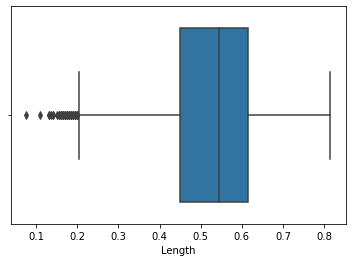

In [11]:
sns.boxplot(df['Length'])

<AxesSubplot:xlabel='Diameter'>

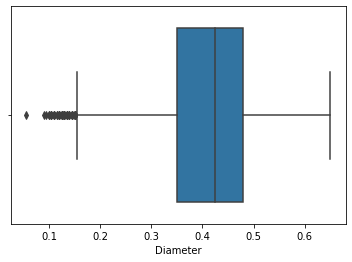

In [12]:
sns.boxplot(df['Diameter'])

<AxesSubplot:xlabel='Height'>

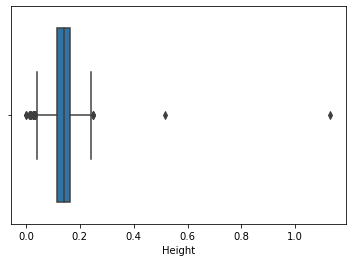

In [13]:
sns.boxplot(df['Height'])

<AxesSubplot:xlabel='Whole weight'>

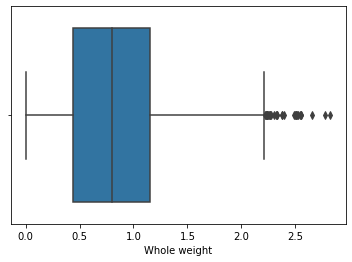

In [14]:
sns.boxplot(df['Whole weight'])

<AxesSubplot:xlabel='Shucked weight'>

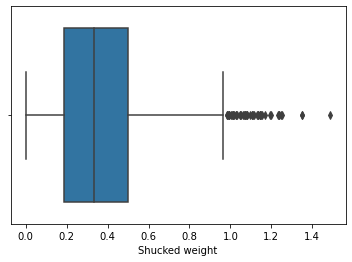

In [15]:
sns.boxplot(df['Shucked weight'])

<AxesSubplot:xlabel='Viscera weight'>

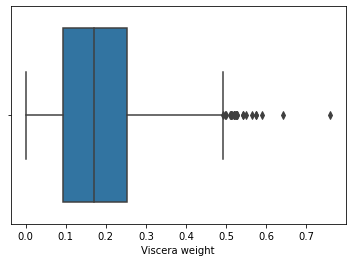

In [16]:
sns.boxplot(df['Viscera weight'])

<AxesSubplot:xlabel='Shell weight'>

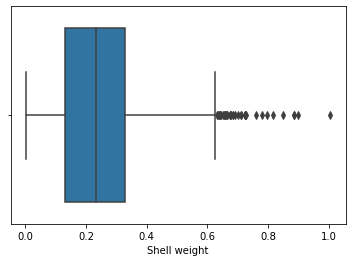

In [17]:
sns.boxplot(df['Shell weight'])

As per the above observations we can say that there are outliers available in every single column, So we have to remove outliers.

<AxesSubplot:xlabel='age', ylabel='Length'>

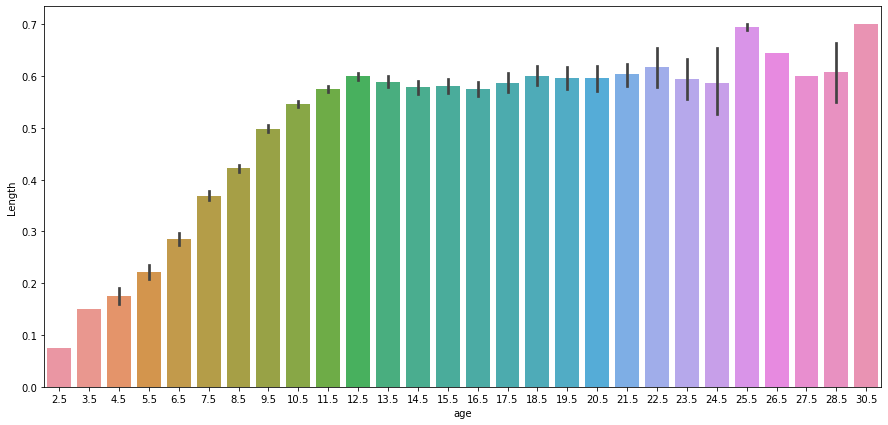

In [18]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df,x ='age',y='Length')

As per the above observations we can see that as the age is increasing height is also increasing

<AxesSubplot:xlabel='age', ylabel='Diameter'>

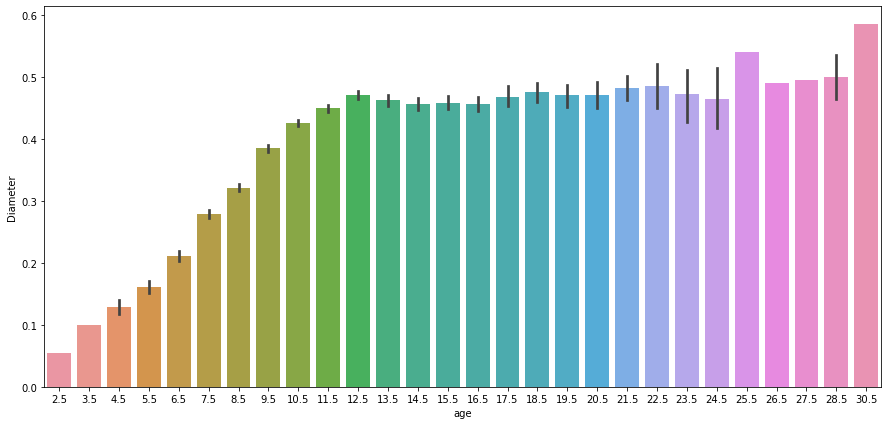

In [19]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Diameter')

The diameter is directly proportional to age

<AxesSubplot:xlabel='age', ylabel='Height'>

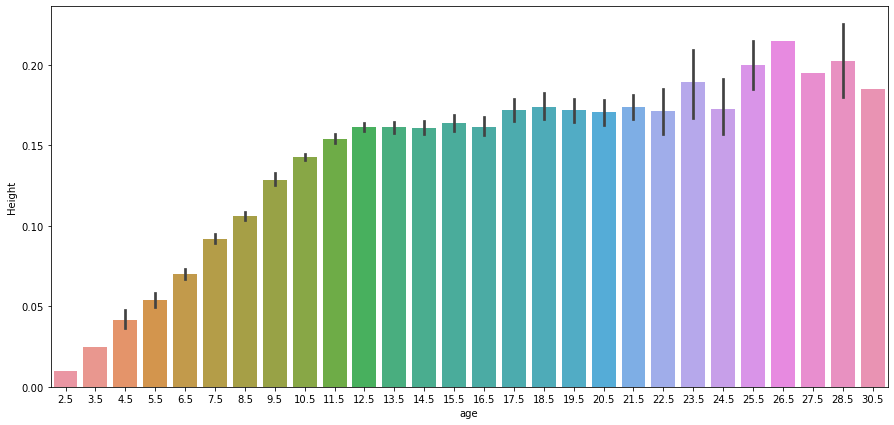

In [20]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Height')

<AxesSubplot:xlabel='age', ylabel='Shucked weight'>

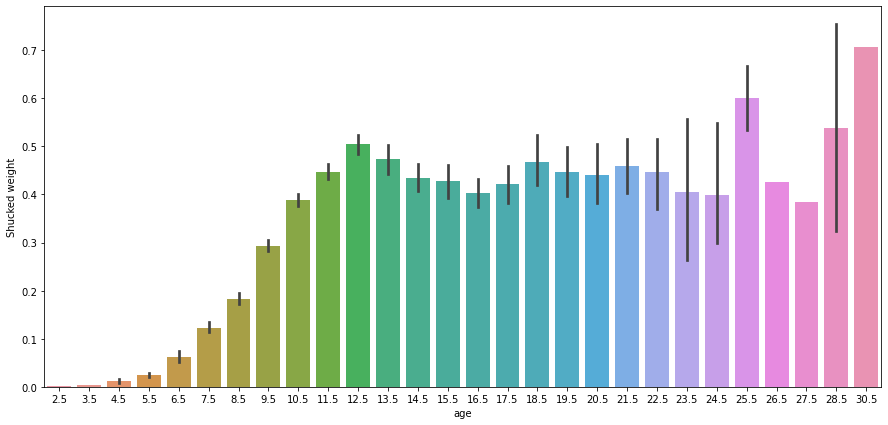

In [21]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Shucked weight')

There is no such major correlation between the shucked weight and age

<AxesSubplot:xlabel='age', ylabel='Whole weight'>

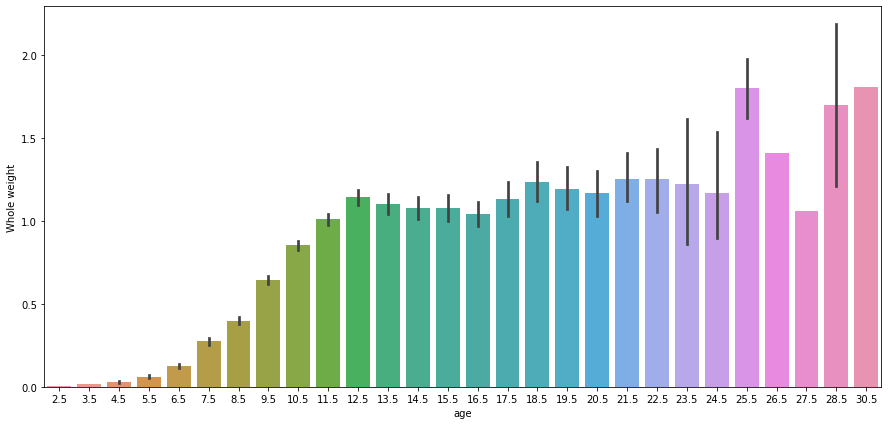

In [22]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Whole weight')

There is no such major correlation between the whole weight and age

<AxesSubplot:xlabel='age', ylabel='Viscera weight'>

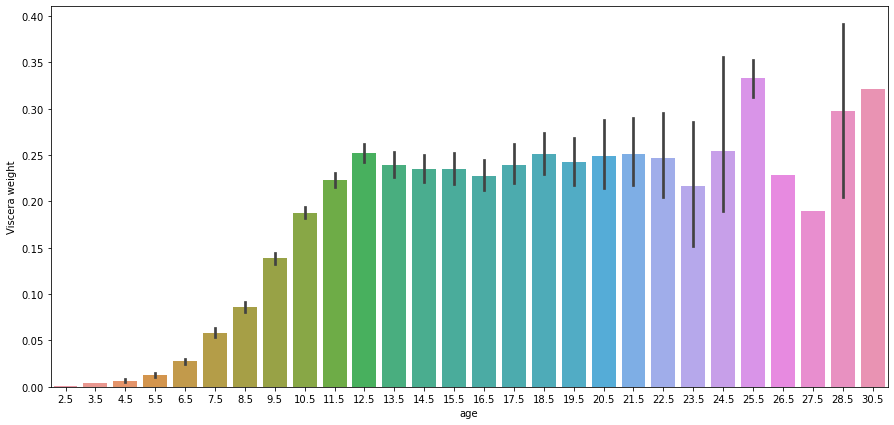

In [23]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Viscera weight')

<AxesSubplot:xlabel='age', ylabel='Shell weight'>

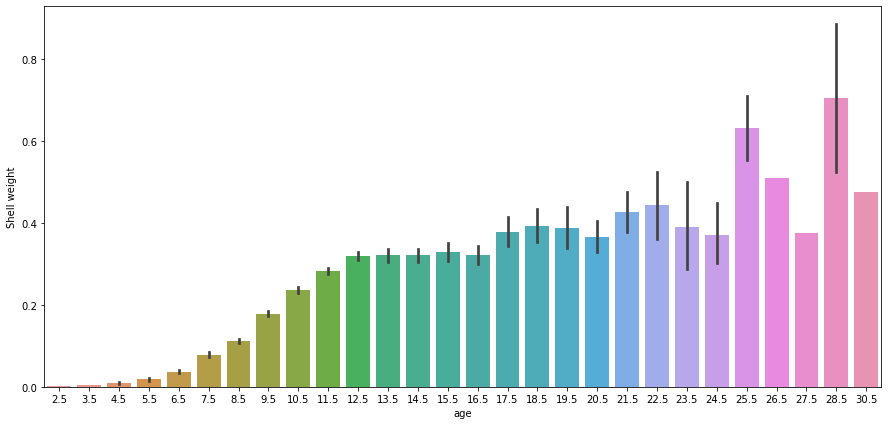

In [24]:
fig = plt.figure(figsize = (15,7))
sns.barplot(data = df, x ='age',y ='Shell weight')

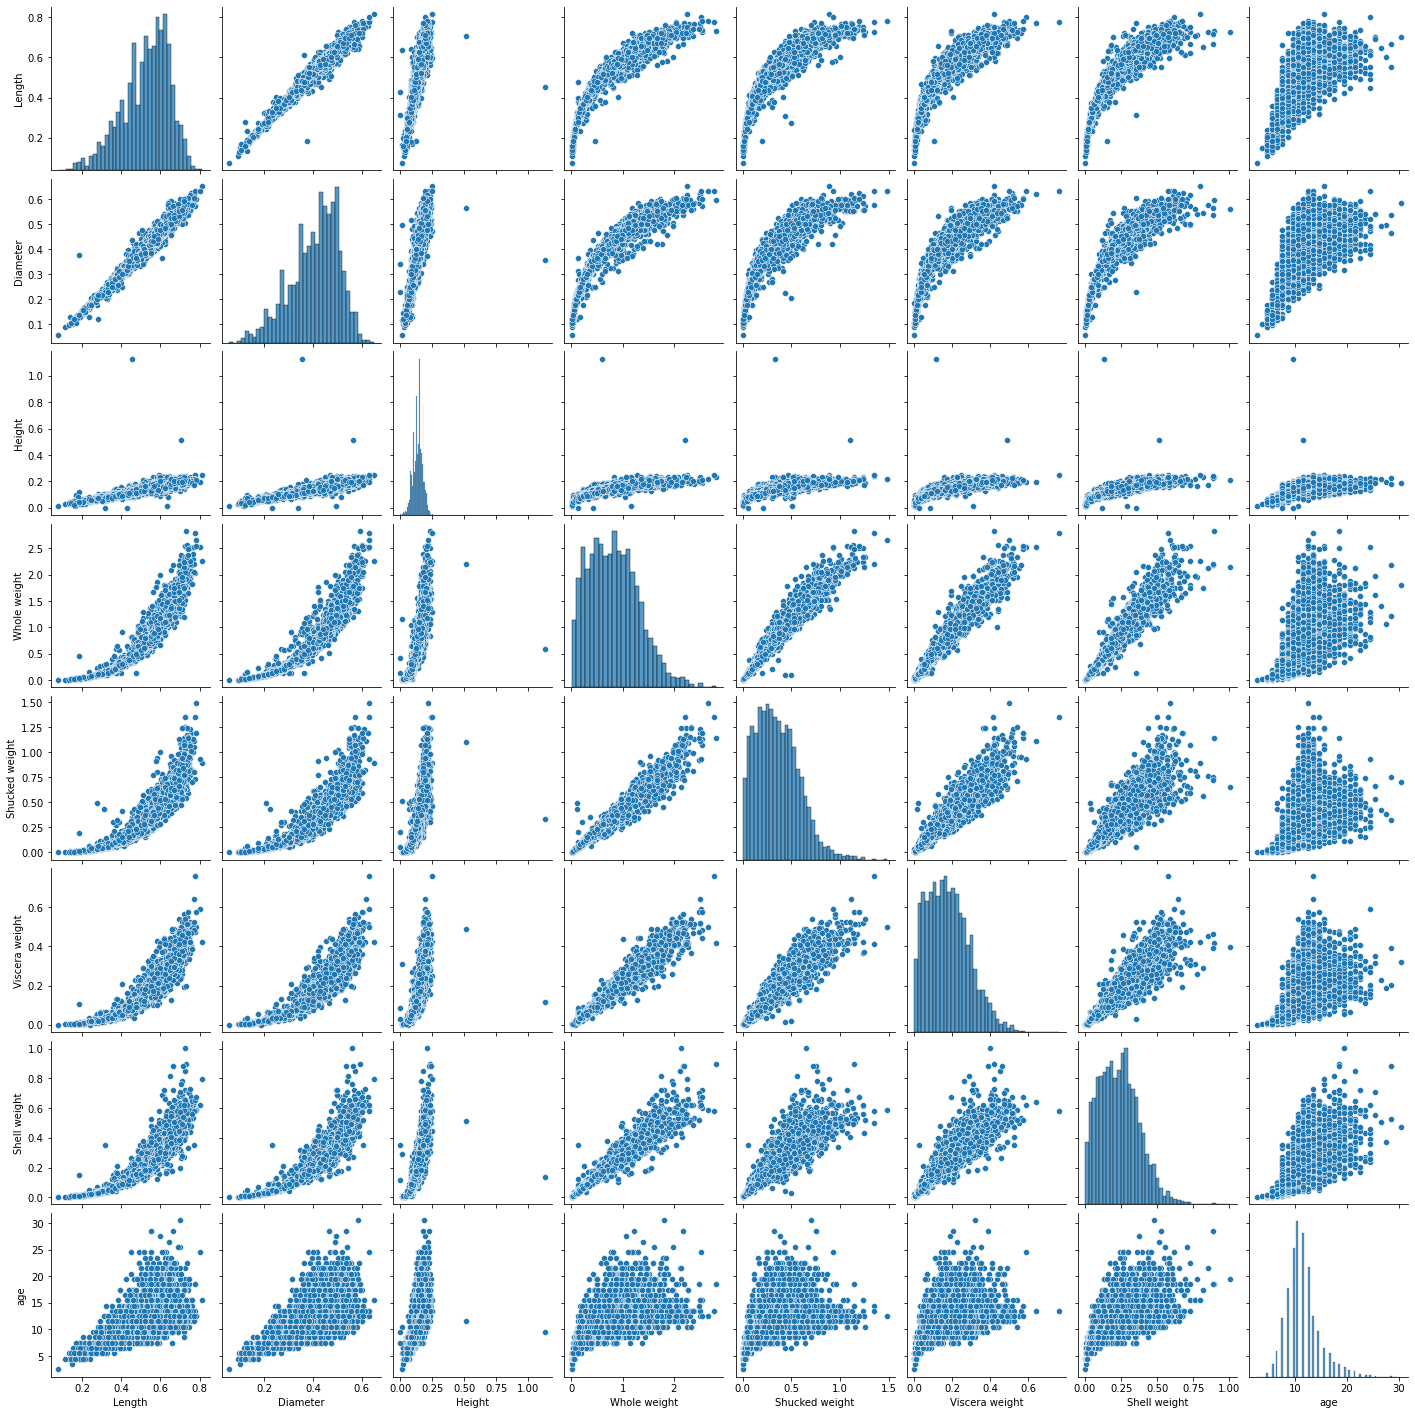

In [25]:
sns.pairplot(df)

In [26]:
df = pd.get_dummies(df)

As per the observation we can see that there is one object column present in the dataset and we have to encode it for the further processing , So I used get_dummies to convert them into numerical 

In [27]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


As in above process we convert the "Sex" column into numerical ,we can see the result 

In [28]:
df.shape

(4177, 11)

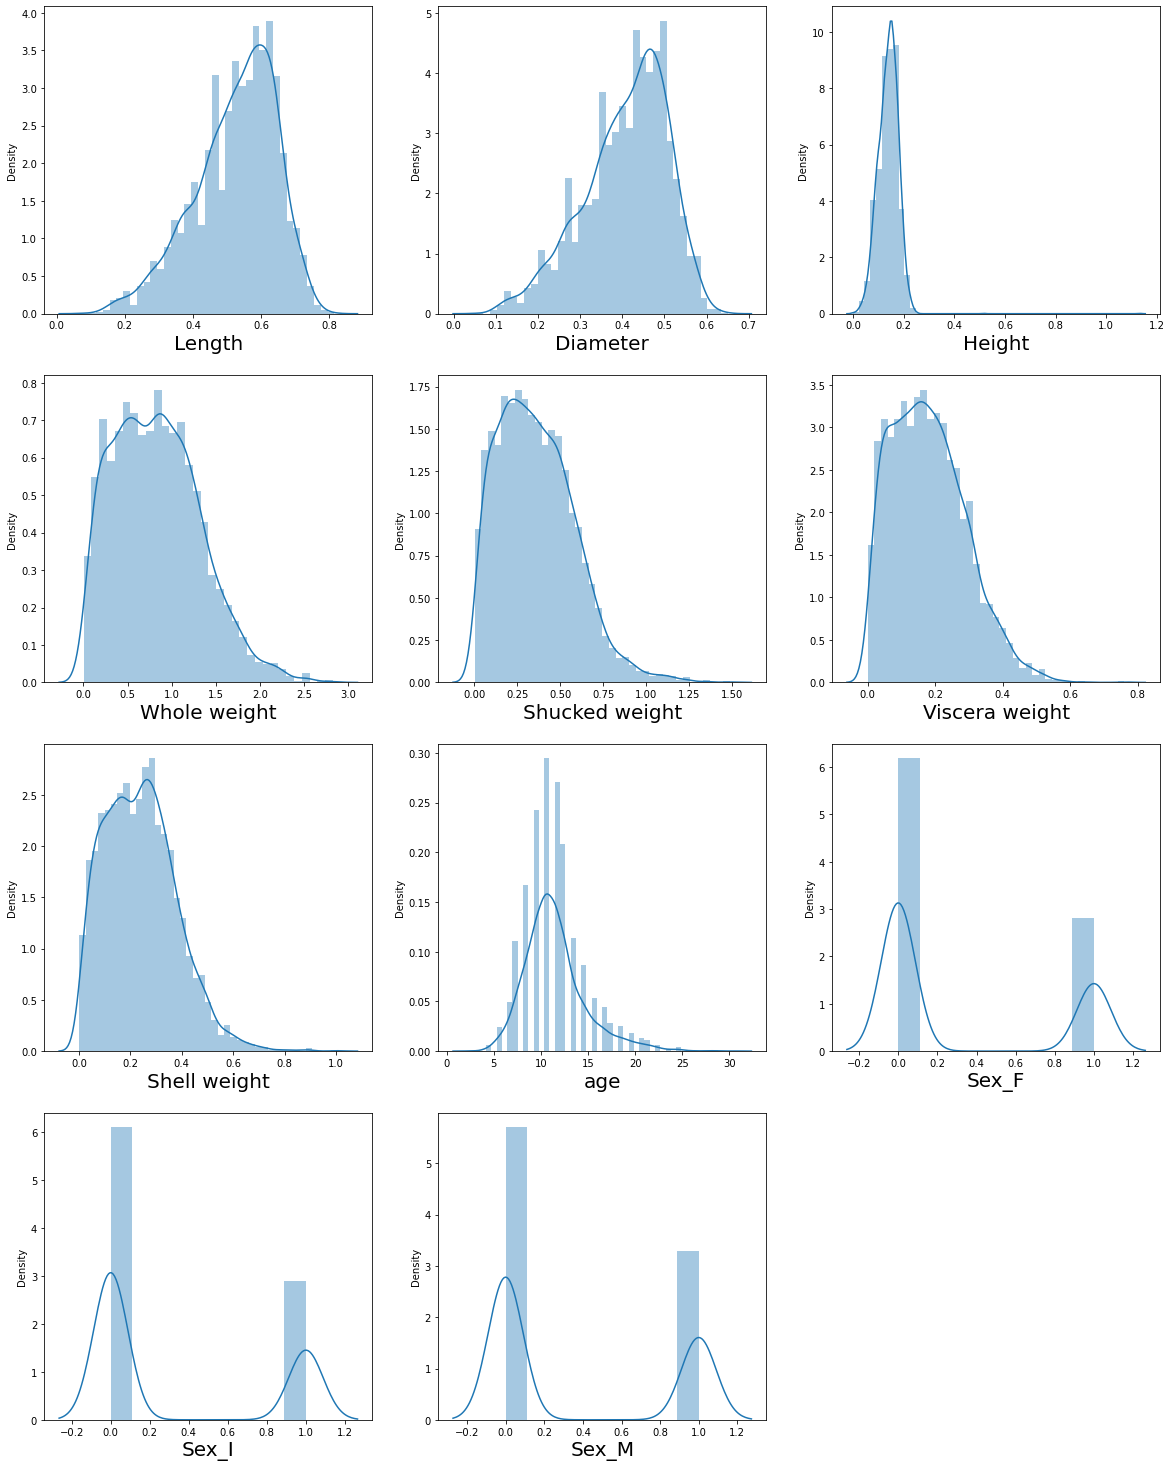

In [29]:
plt.figure(figsize = (20,26))
plotnumber = 1

for column in  df:
    if plotnumber <=11 :
        ax =plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

As per the above observation we can see that there are skewness available in some columns , some are positively skewed and some are negitively skewed

In [30]:
df_corr = df.corr().abs()

<AxesSubplot:>

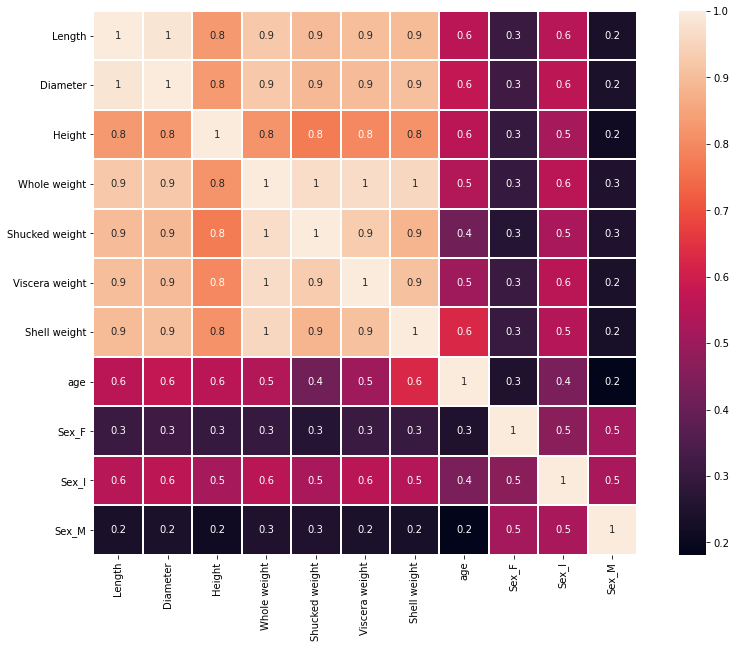

In [31]:
plt.figure(figsize= (15,10))
sns.heatmap(df_corr,annot = True,square = True,
           fmt='.1g', linewidth = 1)

From the Heatmap observation we can say that even after having skewness there are good corelation between the columns, only the 'age' column does not have much corelation but it is a target variable,due to that we cant do any preprocessing with this column

In [32]:
from scipy.stats import zscore
z = np.abs(zscore(df))

Above we checked outliers and there are outlier available in every single column, so we need to remove it, so for removing outliers we are usig z-score method

In [33]:
new_df = df[(z<3).all(axis = 1)]

In [34]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',new_df.shape)
print('Percentage Loss:',(df.shape[0]-new_df.shape[0])/df.shape[0])

Shape Before and After
Shape Before: (4177, 11)
Shape After: (4027, 11)
Percentage Loss: 0.035910940866650705


After removing outliers we can see the shape and data loss due to the outliers is only 3% and it is normal so we can proceed with the  new data

In [35]:
new_df.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
age               0.725464
Sex_F             0.821149
Sex_I             0.731618
Sex_M             0.576507
dtype: float64

We can see the skewness in the columns sex columns have skewness but it has string data in it so we do not need to remove the skewness from this columns and 

Age column has skewness 0.7 but it is a target variable ,so it is also acceptable 

But there is length column in which we have skewness value in negative so before removing the skewness of the length column I ckecked the corelation of the column and it is great and one more factor is that if we apply log method or sqrt method to remove the skewness in result we get Nan value in the dataset so zi decided to not to remove skewness from the length column .

In [36]:
x = new_df.drop('age',axis = 1)
y = new_df['age']

Seperating the target variable from the dataset

In [38]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

selectkbest = SelectKBest()
x_new = selectkbest.fit_transform(x,y)

Using Standard scalar method to scale the data

In [39]:
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.5727806480754438 on Random State 82


Finding the best random_state and in result we get 82 as best random_state

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 82)

Using train_test_split

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print('R2_Score :',r2_score(y_test,predlr))


R2_Score : 0.5727806480754438


Using Linear Regression we get 57.27 R2 score 

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('R2_score :',r2_score(y_test,predrf))

R2_score : 0.5848485491180773


Using RandomForestRegressor we get 58.48 R2 score 

In [43]:
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
print('R_score :',r2_score(y_test,predknn))

R_score : 0.5171794947157666


Using KNeighborsRegressor we get 51.71 R2 score 

In [44]:
SVR = SVR()
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
print('R_score :',r2_score(y_test,predsvr))

R_score : 0.5687463579961267


Using SVR we get 56.87 R2 score 

In [45]:
LRCV = cross_val_score(lr, x, y, cv = 5)
print('Cross Validation score of LinearRegression model:',LRCV.mean())

Cross Validation score of LinearRegression model: 0.43694098788328367


In [46]:
RFCV = cross_val_score(rf, x, y, cv = 5)
print('Cross Validation score of RandomForest model:',RFCV.mean())

Cross Validation score of RandomForest model: 0.4564045942960469


In [47]:
KNNCV = cross_val_score(KNN, x, y, cv = 5)
print('Cross Validation score of KNN model:',KNNCV.mean())

Cross Validation score of KNN model: 0.43186050192621045


In [48]:
SVRCV = cross_val_score(SVR, x, y, cv = 5)
print('Cross Validation score of SVR model:',SVRCV.mean())

Cross Validation score of SVR model: 0.4471361992195


In [55]:
print('Difference between R2_score and Cro_val of LinearRegression:',(57.27-43.69))
print('Difference between R2_score and Cro_val of RandomForest:',(58.48-45.64))
print('Difference between R2_score and Cro_val of KNN:',(51.71-43.18))
print('Difference between R2_score and Cro_val of SVC:',(56.86-44.71))

Difference between R2_score and Cro_val of LinearRegression: 13.580000000000005
Difference between R2_score and Cro_val of RandomForest: 12.839999999999996
Difference between R2_score and Cro_val of KNN: 8.530000000000001
Difference between R2_score and Cro_val of SVC: 12.149999999999999


from the above observation we got less difference in KNN model so we use KNN for GridSearchCV

In [72]:
#Parameters for KNN

parameters = {'n_neighbors':[3,4,5,6,7],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[30,40,20]}

I Used 4 Parameter of KNN for GCV

In [73]:
GCV = GridSearchCV(KNN,param_grid = parameters,cv = 5)

In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 20],
                         'n_neighbors': [3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [76]:
GCV.best_params_

{'algorithm': 'brute',
 'leaf_size': 30,
 'n_neighbors': 7,
 'weights': 'distance'}

As we can see we get best params from the above parameters and we use them for model building

In [81]:
mod = KNeighborsRegressor(algorithm = 'brute',leaf_size = 30,n_neighbors = 7,weights = 'distance')

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print('R2 Score of the final Model:',r2_score(y_test,pred)*100)

modcv = cross_val_score(mod, x, y, cv = 5)
print('Cross Validation score of final model:',modcv.mean()*100)

R2 Score of the final Model: 52.89873951669255
Cross Validation score of final model: 44.912440180882605


After using the GridSearchCV best params we get 

52.89 as R2 Score 

44.91 as CV Score
